# Técnicas de Pré-processamento para OCR

# Importando as bibliotecas

## Escala de cinza (grayscale)

In [214]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\\tesseract.exe'

In [215]:
img = cv2.imread("Imagens/img-process.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# extrai as médias dos campos rgb para igualar os tres campos e obter a escala de cinza, faz para cada pixel
# reduz o tamanho da imagem, reduz de 3 canais para 1 canal, diminui a quantidade de informação

cv2.imshow('imagem', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Limiarização - Thresholding

### Limiariazação Simples (Threshold)

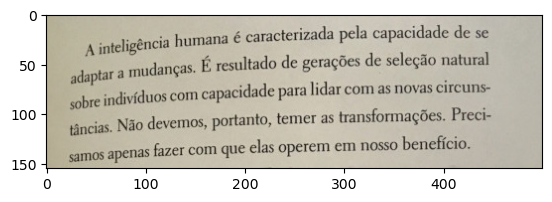

In [216]:
img = cv2.imread("Imagens/trecho-livro.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

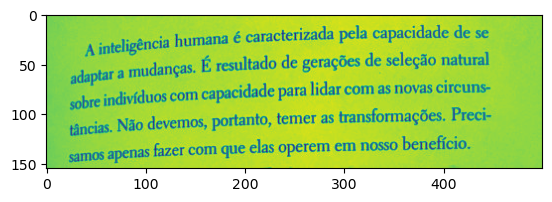

In [217]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

cv2.imshow('imagem', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

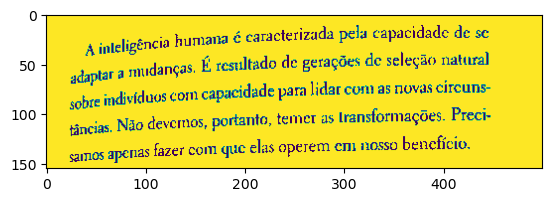

In [218]:
val, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # LIMIARIZAÇÃO SIMPLES
plt.imshow(thresh)
plt.show()

cv2.imshow('imagem', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [219]:
val

127.0

In [220]:
val, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY) # LIMIARIZAÇÃO SIMPLES

cv2.imshow('imagem', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [221]:
val, thresh = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY) # LIMIARIZAÇÃO SIMPLES

cv2.imshow('imagem', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Método de Otsu

In [222]:
val, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(val)

138.0


cv2.imshow('imagem', otsu)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [223]:
img = cv2.imread("Imagens/receita01.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val, thresh = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY)

cv2.imshow('imagem', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [224]:
val, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

cv2.imshow('imagem', otsu)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [225]:
print(val)

119.0


## Limiarização Adaptativa

In [226]:
img = cv2.imread("Imagens/livro02.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print(val)

147.0


cv2.imshow('imagem', otsu)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [227]:
adapt_media = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)

cv2.imshow('imagem', adapt_media)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Limiarização Adaptativa Gaussiana

In [228]:
img = cv2.imread("Imagens/livro_adaptativa.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adapt_media_gauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)

cv2.imshow('imagem', adapt_media_gauss)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [229]:
adapt_media = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)

cv2.imshow('imagem', adapt_media)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Inversão de cores

In [230]:
img = cv2.imread("Imagens/img-process.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow('imagem', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [231]:
gray

array([[ 68,  70,  72, ...,  76,  74,  74],
       [ 68,  70,  73, ...,  75,  74,  77],
       [ 70,  70,  72, ...,  74,  73,  76],
       ...,
       [ 67,  69,  82, ..., 123, 123, 124],
       [ 70,  76,  92, ..., 124, 124, 125],
       [ 70,  70,  80, ..., 123, 122, 123]], dtype=uint8)

In [232]:
invert = 255 - gray

In [233]:
invert

array([[187, 185, 183, ..., 179, 181, 181],
       [187, 185, 182, ..., 180, 181, 178],
       [185, 185, 183, ..., 181, 182, 179],
       ...,
       [188, 186, 173, ..., 132, 132, 131],
       [185, 179, 163, ..., 131, 131, 130],
       [185, 185, 175, ..., 132, 133, 132]], dtype=uint8)

cv2.imshow('imagem', invert)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('imagem', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [234]:
invert = 255 - thresh

cv2.imshow('imagem', invert)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Redimensionamento
- INTER_NEAREST - uma interpolação de vizinho mais próximo. É muito usado por ser o mais rápido
- INTER_LINEAR - uma interpolação bilinear (é usada por padrão), boa no geral para aumentar e também para diminuir imagens
- INTER_AREA - usa a relação de área de pixel. Pode ser um método preferido para a redução de imagens pois fornece resultados sem moiré (efeito geralmente indesejado na imagem). Mas quando a imagem é amplidada, é semelhante ao método INTER_NEAREST.
- INTER_CUBIC - bicúbica (4x4 pixel vizinhos). Possui resultados melhores.
- INTER_LANCZOS4 - interpolação Lanczos (8x8 pixel vizinhos). Dentre esses algoritmos, é o que apresenta resultados com a melhor qualidade.

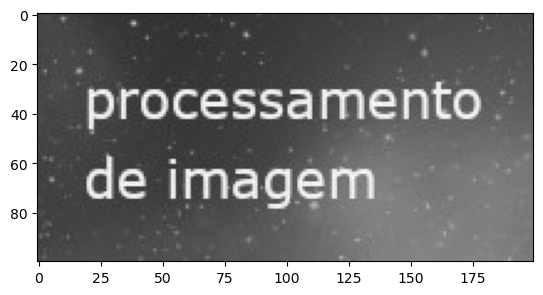

In [235]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR))
plt.show()

In [236]:
maior = cv2.resize(gray, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LANCZOS4)

cv2.imshow('imagem', maior)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [237]:
menor = cv2.resize(gray, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

cv2.imshow('imagem', menor)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Operações Morfológicas

In [238]:
img = cv2.imread("Imagens/texto-opencv.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Erosão

In [239]:
erosao = cv2.erode(gray, np.ones((3,3), np.uint8))

cv2.imshow('imagem', erosao)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Dilatação

In [240]:
dilatacao = cv2.dilate(gray, np.ones((3, 3), np.uint8))

cv2.imshow('imagem', dilatacao)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Abertura

In [241]:
erosao = cv2.erode(gray, np.ones((5,5), np.uint8))
abertura = cv2.dilate(erosao, np.ones((5,5), np.uint8))

cv2.imshow('imagem', abertura)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Fechamento

In [242]:
img = cv2.imread('Imagens/texto-opencv2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [243]:
dilatacao = cv2.dilate(img, np.ones((5,5)))
fechamento = cv2.erode(dilatacao, np.ones((5,5)))

cv2.imshow('imagem', fechamento)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Remoção de Ruído

## Desfoque com Média

In [244]:
img = cv2.imread("Imagens/teste_ruido.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow('imagem', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [245]:
 desfoque_media = cv2.blur(gray, (5,5))

cv2.imshow('imagem', desfoque_media)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Desfoque Gaussiano

In [250]:
desfoque_gaussiano = cv2.GaussianBlur(gray, (5,5), 0)

cv2.imshow('imagem', desfoque_gaussiano)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Desfoque com Mediana

In [252]:
desfoque_mediana = cv2.medianBlur(gray, 3)

cv2.imshow('imagem', desfoque_mediana)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Filtro Bilateral

In [254]:
desfoque_bilateral = cv2.bilateralFilter(gray, 15, 55, 45)

cv2.imshow('imagem', desfoque_bilateral)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Detecção de textos

In [260]:
cv2.imshow('imagem', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [261]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(thresh, lang='por', config=config_tesseract)
print(texto)

PAO-DE-LÓ

| Peneire junto a farinha, a maisena e o fermento e reserve.

2 Bata as claras em neve. Adicione as gemas uma a uma.
Acrescente o açúcar, sempre batendo berm. Junte a água, alter-
nando-a com a mistura de farinha.

) Misture rapidamente, coloque em uma assadeira untada e
forrada com papel-manteiga. Asse em forno regular.



# Exercicio
Para praticar as técnicas de pré-processamento, você pode utilizar a imagem abaixo e aplicar algumas das técnicas para deixar a imagem no formato ideal para enviarmos para o OCR. Na próxima aula você pode assistir o vídeo com a solução

In [262]:
img = cv2.imread("Imagens/exercicio_pre-processamento.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [263]:
cv2.imshow('imagem', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [268]:
invert = 255 - gray

In [284]:
cv2.imshow('imagem', invert)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [304]:
adapt_media_gauss = cv2.adaptiveThreshold(invert, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 9)

In [324]:
cv2.imshow('imagem', adapt_media_gauss)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [322]:
texto = pytesseract.image_to_string(adapt_media_gauss, lang='por', config=config_tesseract)

In [323]:
print(texto)

O SUCESSO É A SOMA
DE PEQUENOS ESFORÇOS
REPETIDOS DIA APÓS DIA.

Robert Collier

